# Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

### Column Profiling:

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

### Concepts Tested:

- Ensemble Learning- Bagging
- Ensemble Learning- Boosting
- KNN Imputation of Missing Values
- Working with an imbalanced dataset

### What "good" looks like:

- Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.
- Convert date-like features to their respective data type
- Check for missing values and Prepare data for KNN Imputation
1. You may consider only numerical features for this purpose
- Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)
1. You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)
- 
#### Feature Engineering Steps:

1. Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1
2. Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1
3. Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

- Statistical summary of the derived dataset
- Check correlation among independent variables and how they interact with each other
- One hot encoding of the categorical variable
- Class Imbalance Treatment
- Standardization of training data
- Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning
- Results Evaluation:
 1. Classification Report
 2. ROC AUC curve
- Provide actionable Insights & Recommendations

### Evaluation Criteria (100 Points):

#### Define Problem Statement and perform Exploratory Data Analysis (10 points)
- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables)
- Illustrate the insights based on EDA
- Comments on range of attributes, outliers of various attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plots
#### Data Preprocessing (50 Points)
- KNN Imputation
- Feature Engineering
- Class Imbalance treatment
- Standardization
- Encoding
#### Model building (20 Points)
- 1 Ensemble - Bagging Algorithm
- 1 Ensemble - Boosting Algorithm
#### Results Evaluation (10 Points)
- ROC AUC Curve & comments
- Classification Report (Confusion Matrix etc)
#### Actionable Insights & Recommendations (10 Points)

### Submission Process:

- Type your insights and recommendations in the text editor.
- Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
- Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
df = pd.read_csv('ola_driver_scaler.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [494]:
df = df.drop(columns='Unnamed: 0')

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [496]:
##Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['MMM-YY']

0       2019-01-01
1       2019-02-01
2       2019-03-01
3       2020-11-01
4       2020-12-01
           ...    
19099   2020-08-01
19100   2020-09-01
19101   2020-10-01
19102   2020-11-01
19103   2020-12-01
Name: MMM-YY, Length: 19104, dtype: datetime64[ns]

In [497]:
##Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
##Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [499]:
## data shape
df.shape

(19104, 13)

### Imputation of missing data


In [500]:
## number of rows having missing values in each columns
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [501]:
## percentage of missing values
(df.isnull().sum()/len(df))*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [502]:
# since LastWorkingDate  has 91.54% missing data but it's not going to impact because it's driver last working date in the company
# so it will work as a target variable

In [503]:
df['Gender'].value_counts()

0.0    11074
1.0     7978
Name: Gender, dtype: int64

In [504]:
df['Education_Level'].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

In [505]:
## need numerical data types only
df_num = df.select_dtypes(include = np.number)
df_num.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1


In [506]:
## driver id will impact age and gender missing value imputation 
df_num['Driver_ID'].value_counts()

2049    24
2134    24
1271    24
1191    24
1111    24
        ..
1227     1
1358     1
2321     1
1195     1
2088     1
Name: Driver_ID, Length: 2381, dtype: int64

In [507]:
df_num.drop(columns = 'Driver_ID', inplace= True)

C:\Users\Friends\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [508]:
columns = df_num.columns
columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [509]:
df_num.isnull().sum()

Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [510]:
from sklearn.impute import KNNImputer

In [511]:
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
data = imputer.fit_transform(df_num)

In [512]:
new_df = pd.DataFrame(data)
new_df

,0,1,2,3,4,5,6,7
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [513]:
## checking null values
new_df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [514]:
new_df.columns = columns
new_df.head(2)

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0


In [515]:
df.head(2)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2


### Getting the remaining columns back

In [516]:
remaining_columns=list(set(df.columns).difference(set(columns)))

In [517]:
remaining_columns

['Dateofjoining', 'MMM-YY', 'LastWorkingDate', 'City', 'Driver_ID']

In [518]:
data = pd.concat([df[remaining_columns], new_df], axis = 1)

In [519]:
data.head()

,Dateofjoining,MMM-YY,LastWorkingDate,City,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2018-12-24,2019-01-01,NaT,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2018-12-24,2019-02-01,NaT,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2018-12-24,2019-03-01,2019-03-11,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-06,2020-11-01,NaT,C7,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-11-06,2020-12-01,NaT,C7,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [520]:
df[df['Driver_ID'] == 1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2


In [521]:
data[data['Driver_ID'] == 1]

,Dateofjoining,MMM-YY,LastWorkingDate,City,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2018-12-24,2019-01-01,NaT,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2018-12-24,2019-02-01,NaT,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2018-12-24,2019-03-01,2019-03-11,C23,1,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0


In [522]:
### Aggregation is required to work on above datasets

function_dict = {'Age':'max', 'Gender':'first','City':'first',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'last','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last'}
new_train=data.groupby(['Driver_ID','MMM-YY']).aggregate(function_dict)

In [523]:
new_train

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
...                                   ...    ...           ...   
2788      2020-08-01                  2.0    2.0    2020-06-08   
          2020-09-01                  2.0    2.0    2020-06-08   
          2020-10-01                  2.0    2.0    2020-06-08   
          2020-11-01                  2.0    2.0    2020-06-08   
          2020-12-01                  2.0    2.0    2020-06-08   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
...                              ...                   ...               ...  
2788      2020-08-01             NaT              740280.0               3.0  
          2020-09-01             NaT              448370.0               3.0  
          2020-10-01             NaT                   0.0               2.0  
          2020-11-01             NaT              200420.0               2.0  
          2020-12-01             NaT              411480.0               2.0  

[19104 rows x 11 columns]

In [524]:
#direct sorting can work but you have to use sort_values
df=new_train.sort_index(ascending=[True,True])
df.head(10)

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
4         2019-12-01  43.0     0.0  C13              2.0  65603.0   
          2020-01-01  43.0     0.0  C13              2.0  65603.0   
          2020-02-01  43.0     0.0  C13              2.0  65603.0   
          2020-03-01  43.0     0.0  C13              2.0  65603.0   
          2020-04-01  43.0     0.0  C13              2.0  65603.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   
4         2019-12-01                  2.0    2.0    2019-12-07   
          2020-01-01                  2.0    2.0    2019-12-07   
          2020-02-01                  2.0    2.0    2019-12-07   
          2020-03-01                  2.0    2.0    2019-12-07   
          2020-04-01                  2.0    2.0    2019-12-07   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0  
4         2019-12-01             NaT                   0.0               1.0  
          2020-01-01             NaT                   0.0               1.0  
          2020-02-01             NaT                   0.0               1.0  
          2020-03-01             NaT              350000.0               1.0  
          2020-04-01      2020-04-27                   0.0               1.0

In [525]:
df1=pd.DataFrame()

In [526]:
df1['Driver_ID'] = data['Driver_ID'].unique()

In [527]:
df1['Driver_ID']

0          1
1          2
2          4
3          5
4          6
        ... 
2376    2784
2377    2785
2378    2786
2379    2787
2380    2788
Name: Driver_ID, Length: 2381, dtype: int64

### Aggregation at Driver Level

In [528]:
df1['Age'] = list(df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df1['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['First_Income'] = list(df.groupby('Driver_ID').agg({'Income':'first'})['Income'])
df1['Last_Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])
df1['First_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating'])
df1['LastWorkingDate'] = list(df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'])

In [529]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Driver_ID               2381 non-null   int64         
 1   Age                     2381 non-null   float64       
 2   Gender                  2381 non-null   float64       
 3   City                    2381 non-null   object        
 4   Education               2381 non-null   float64       
 5   First_Income            2381 non-null   float64       
 6   Last_Income             2381 non-null   float64       
 7   Joining_Designation     2381 non-null   float64       
 8   Grade                   2381 non-null   float64       
 9   Total_Business_Value    2381 non-null   float64       
 10  Last_Quarterly_Rating   2381 non-null   float64       
 11  First_Quarterly_Rating  2381 non-null   float64       
 12  LastWorkingDate         1616 non-null   datetime

In [530]:
df1.head()

,Driver_ID,Age,Gender,City,Education,First_Income,Last_Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,First_Quarterly_Rating,LastWorkingDate
0,1,28.0,0.0,C23,2.0,57387.0,57387.0,1.0,1.0,1715580.0,2.0,2.0,2019-03-11
1,2,31.0,0.0,C7,2.0,67016.0,67016.0,2.0,2.0,0.0,1.0,1.0,NaT
2,4,43.0,0.0,C13,2.0,65603.0,65603.0,2.0,2.0,350000.0,1.0,1.0,2020-04-27
3,5,29.0,0.0,C9,0.0,46368.0,46368.0,1.0,1.0,120360.0,1.0,1.0,2019-03-07
4,6,31.0,1.0,C11,1.0,78728.0,78728.0,3.0,3.0,1265000.0,2.0,1.0,NaT


In [531]:
df.head()

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0

### Creating a column which tells if the quarterly rating has increased for that employee
### for those whose quarterly rating has increased we assign the value 1

In [532]:
df1['Quarterly_Rating_Increased'] = np.where(df1['Last_Quarterly_Rating'] - df1['First_Quarterly_Rating'] > 0, 1,0)

In [533]:
df1['Quarterly_Rating_Increased']

0       0
1       0
2       0
3       0
4       1
       ..
2376    1
2377    0
2378    0
2379    0
2380    1
Name: Quarterly_Rating_Increased, Length: 2381, dtype: int32

In [534]:
df1

,Driver_ID,Age,Gender,City,Education,First_Income,Last_Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,First_Quarterly_Rating,LastWorkingDate,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,57387.0,1.0,1.0,1715580.0,2.0,2.0,2019-03-11,0
1,2,31.0,0.0,C7,2.0,67016.0,67016.0,2.0,2.0,0.0,1.0,1.0,NaT,0
2,4,43.0,0.0,C13,2.0,65603.0,65603.0,2.0,2.0,350000.0,1.0,1.0,2020-04-27,0
3,5,29.0,0.0,C9,0.0,46368.0,46368.0,1.0,1.0,120360.0,1.0,1.0,2019-03-07,0
4,6,31.0,1.0,C11,1.0,78728.0,78728.0,3.0,3.0,1265000.0,2.0,1.0,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,82815.0,2.0,3.0,21748820.0,4.0,3.0,NaT,1
2377,2785,34.0,1.0,C9,0.0,12105.0,12105.0,1.0,1.0,0.0,1.0,1.0,2020-10-28,0
2378,2786,45.0,0.0,C19,0.0,35370.0,35370.0,2.0,2.0,2815090.0,1.0,2.0,2019-09-22,0
2379,2787,28.0,1.0,C20,2.0,69498.0,69498.0,1.0,1.0,977830.0,1.0,2.0,2019-06-20,0


In [535]:
df1['Quarterly_Rating_Increased'].value_counts()

0    2023
1     358
Name: Quarterly_Rating_Increased, dtype: int64

#### 1. Creating a column called target which tells if the person has left the company
#### 2. Persons who have a last working date will have the value 1
#### 3. The dataset which has the employee ids and specifies if last working date is null and the employee ids who do not have last working date are assigned 0.


In [536]:
# df1['LastWorkingDate'].apply(lambda x: 0 if x == None else 1)
df1['Target'] = np.where(pd.notnull(df1[['LastWorkingDate']]), 1,0)

In [537]:
df1.head()

,Driver_ID,Age,Gender,City,Education,First_Income,Last_Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,First_Quarterly_Rating,LastWorkingDate,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,57387.0,1.0,1.0,1715580.0,2.0,2.0,2019-03-11,0,1
1,2,31.0,0.0,C7,2.0,67016.0,67016.0,2.0,2.0,0.0,1.0,1.0,NaT,0,0
2,4,43.0,0.0,C13,2.0,65603.0,65603.0,2.0,2.0,350000.0,1.0,1.0,2020-04-27,0,1
3,5,29.0,0.0,C9,0.0,46368.0,46368.0,1.0,1.0,120360.0,1.0,1.0,2019-03-07,0,1
4,6,31.0,1.0,C11,1.0,78728.0,78728.0,3.0,3.0,1265000.0,2.0,1.0,NaT,1,0


### Creating a column which tells if the monthly income has increased for that employee
### for those whose monthly income has increased we assign the value 1

In [538]:
df1['Income_Increased'] = np.where(df1['Last_Income'] - df1['First_Income'] > 0, 1,0)

In [539]:
df1['Income_Increased'].value_counts()

0    2338
1      43
Name: Income_Increased, dtype: int64

In [540]:
df1.head()

,Driver_ID,Age,Gender,City,Education,First_Income,Last_Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,First_Quarterly_Rating,LastWorkingDate,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,57387.0,1.0,1.0,1715580.0,2.0,2.0,2019-03-11,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,67016.0,2.0,2.0,0.0,1.0,1.0,NaT,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,65603.0,2.0,2.0,350000.0,1.0,1.0,2020-04-27,0,1,0
3,5,29.0,0.0,C9,0.0,46368.0,46368.0,1.0,1.0,120360.0,1.0,1.0,2019-03-07,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,78728.0,3.0,3.0,1265000.0,2.0,1.0,NaT,1,0,0


## Data Analysis

In [543]:
df1['Target'].value_counts(normalize= True)*100

1    67.870643
0    32.129357
Name: Target, dtype: float64

#### Observation - Around 68% driver have left the organization.

<AxesSubplot:>

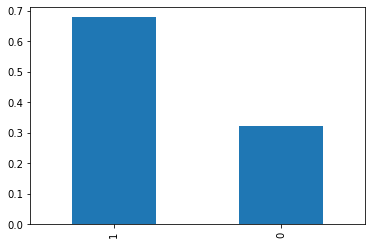

In [563]:
df1['Target'].value_counts(normalize=True).plot(kind='bar')

In [549]:
df1['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

<AxesSubplot:xlabel='Last_Quarterly_Rating', ylabel='count'>

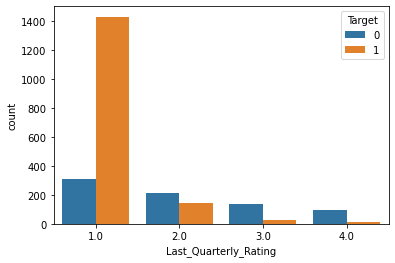

In [586]:
sns.countplot(data= df1, x = 'Last_Quarterly_Rating', hue = 'Target')

C:\Users\Friends\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Business_Value', ylabel='Density'>

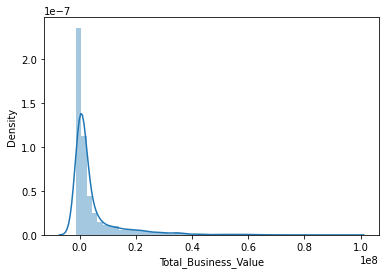

In [590]:
sns.distplot(df1['Total_Business_Value'])

<AxesSubplot:xlabel='Last_Quarterly_Rating', ylabel='Total_Business_Value'>

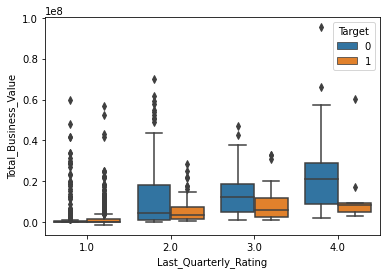

In [582]:
sns.boxplot (data=df1, x='Last_Quarterly_Rating', y='Total_Business_Value',hue='Target')

<AxesSubplot:xlabel='Education', ylabel='Total_Business_Value'>

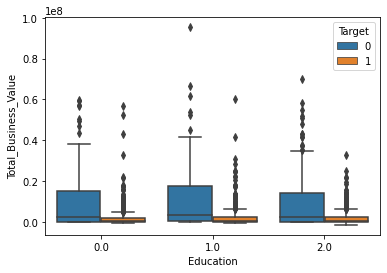

In [583]:
sns.boxplot (data=df1, x='Education', y='Total_Business_Value',hue='Target')

### Statistical Summary


In [410]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.376354e+01,5.946568e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.916175e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
First_Income,2381.0,5.920906e+04,2.827590e+04,10747.0,39104.0,55276.0,75765.0,188418.0
Last_Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0


#### Observation
- There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and the maximum age is 58 years. 75% of the employees have their monthly income less than or equal to 75,986 units. 50% of the mployees have acquired 8,17,680 as the their total business value.

In [411]:
df1.describe(include = 'object')

,City
count,2381
unique,29
top,C20
freq,152


- Most of the drivers in the dataset were male, lived in C20 city and have completed their graduation in education.

### 'City' column is a categorical feature, need to OHE, Target encoding to convert it to Numerical variable

In [412]:
from category_encoders import TargetEncoder

In [413]:
te = TargetEncoder()
cv = te.fit_transform(X = df1['City'], y = df1['Target'])
df1['City'] = cv
df1['City'].value_counts()

C:\Users\Friends\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Friends\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


0.730263    152
0.683168    101
0.531250     96
0.698925     93
0.674157     89
0.595506     89
0.709302     86
0.595238     84
0.634146     82
0.719512     82
0.609756     82
0.654321     81
0.700000     80
0.600000     80
0.607595     79
0.734177     79
0.705128     78
0.675325     77
0.684211     76
0.706667     75
0.770270     74
0.729730     74
0.698630     73
0.569444     72
0.763889     72
0.774648     71
0.816901     71
0.637681     69
0.703125     64
Name: City, dtype: int64

In [420]:
df1.dtypes

Driver_ID                              int64
Age                                  float64
Gender                               float64
City                                 float64
Education                            float64
First_Income                         float64
Last_Income                          float64
Joining_Designation                  float64
Grade                                float64
Total_Business_Value                 float64
Last_Quarterly_Rating                float64
First_Quarterly_Rating               float64
LastWorkingDate               datetime64[ns]
Quarterly_Rating_Increased             int32
Target                                 int32
Income_Increased                       int32
dtype: object

In [421]:
df1.drop(['LastWorkingDate', 'Driver_ID'], axis = 1, inplace = True)

In [422]:
# All categorical features are in numerical features
df1.dtypes

Age                           float64
Gender                        float64
City                          float64
Education                     float64
First_Income                  float64
Last_Income                   float64
Joining_Designation           float64
Grade                         float64
Total_Business_Value          float64
Last_Quarterly_Rating         float64
First_Quarterly_Rating        float64
Quarterly_Rating_Increased      int32
Target                          int32
Income_Increased                int32
dtype: object

## Correlation
#### need to check the correlation of features, which feature is more important

<AxesSubplot:>

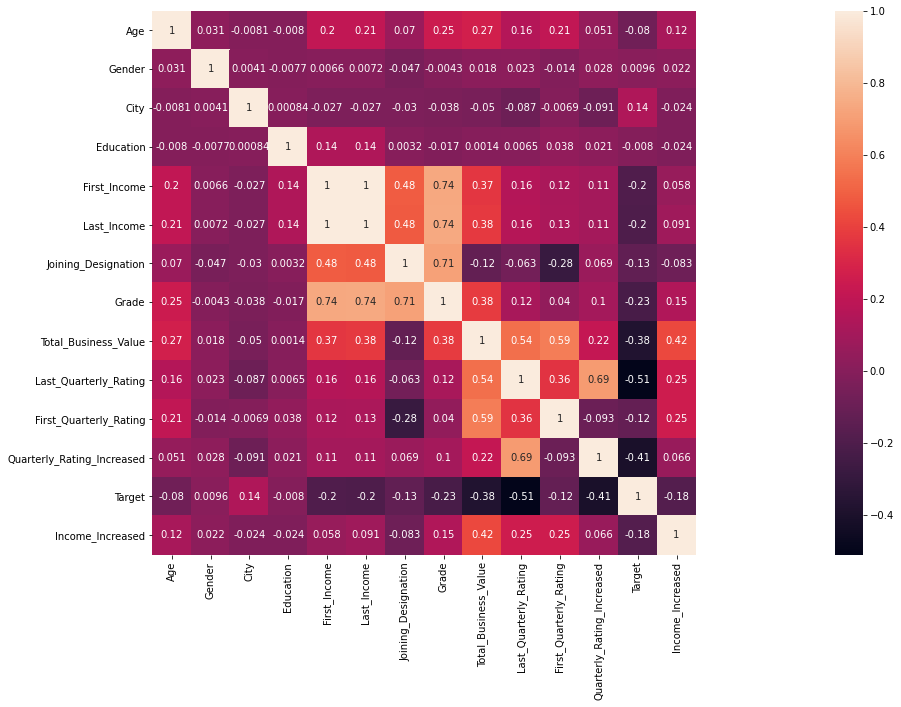

In [424]:
plt.figure(figsize= (50,10))
sns.heatmap(df1.corr(method='pearson'), annot= True, square= True)

### Need to check whether data imbalanced or not

In [444]:
y.value_counts(normalize= True)*100

1    67.870643
0    32.129357
Name: Target, dtype: float64

### Column standardization and Normalization
- Mean centering and Variance scaling (Standard Scaling)
- MinMax Scaling

### Scaling the data (Only done on training set)
- Normalising the Dataset. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

#### Splitting data into train and test with 60%, 20%, and 20%

In [427]:
from sklearn.model_selection import train_test_split, KFold

In [429]:
X = df1.drop(columns = 'Target')
y = df1['Target']

In [432]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1428, 13)
(476, 13)
(477, 13)


In [433]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [435]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [436]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Decision tree

In [445]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = DecisionTreeClassifier(random_state=7, max_depth = 4)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

K-Fold Accuracy Mean: Train: 82.39999999999999 Validation: 79.60000000000001


### RandomForest 

In [447]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [460]:
# Hyperparameter tunning 
params = {
    'max_depth' : [3,4,5,7],
    'n_estimators' : [50,100,150,200],
    'max_features' : [3,6,9,12]
}

In [461]:
rfc = RandomForestClassifier()
model = GridSearchCV(rfc, params, scoring = 'accuracy', n_jobs = -1, cv=3, return_train_score=True)

In [462]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7],
                         'max_features': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [463]:
model.best_score_

0.8172268907563026

In [464]:
model.best_params_

{'max_depth': 4, 'max_features': 12, 'n_estimators': 100}

In [465]:
# training model at tunned parameters
model = RandomForestClassifier(random_state=7, max_depth = 4, n_estimators= 100, max_features = 12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8364779874213837

In [473]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred))

[[ 87  56]
 [ 22 312]]


In [474]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       143
           1       0.85      0.93      0.89       334

    accuracy                           0.84       477
   macro avg       0.82      0.77      0.79       477
weighted avg       0.83      0.84      0.83       477



### XGBoost

In [477]:
!pip install xgboost

In [480]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=4, learning_rate=0.2, colsample_bytree=0.8, silent=True)
xgb.fit(X_train, y_train)


print( xgb.score(X_train, y_train))
print( xgb.score(X_test, y_test))

[19:10:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.9488795518207283
0.8071278825995807


### LightGBM

In [481]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [482]:
from lightgbm import LGBMClassifier

lgm = LGBMClassifier()
lgm.fit(X_train, y_train)


print( lgm.score(X_train, y_train))
print( lgm.score(X_test, y_test))

0.9782913165266106
0.8197064989517819


### GBDT

In [483]:
from sklearn.ensemble import GradientBoostingClassifier

In [484]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8218029350104822

## Final model selection 

- As checked, Random forest classifier given higher score as compared to other ensemble learning algorithm
- Score = 83.6 %

### Feature Importance for the best model so far in Random Forest Model

- Feature importance based on mean decrease in impurity

In [486]:
forest = RandomForestClassifier(random_state=7, max_depth = 4, n_estimators= 100, max_features = 12)
forest.fit(X_train, y_train)

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.047 seconds


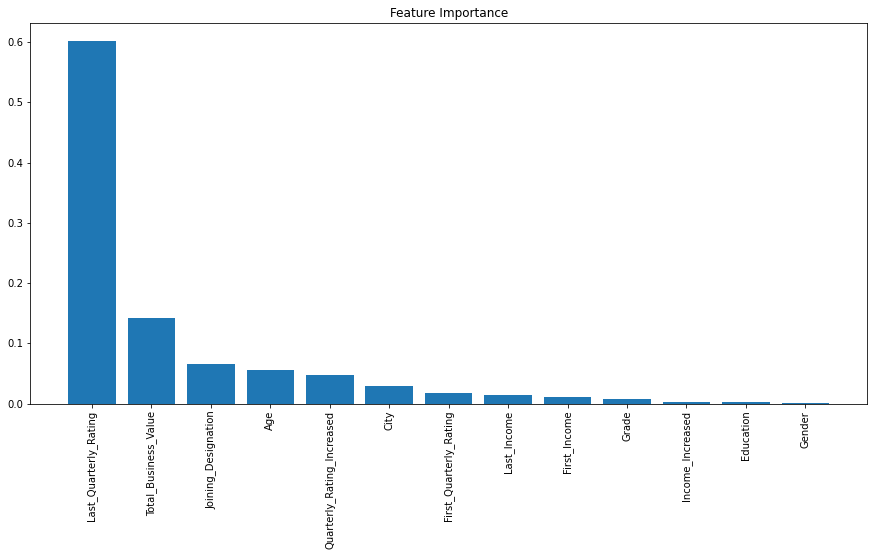

In [575]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order

names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances


plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

### Below fetaures are important to consider whether drivers will leave or not
- 'Last_Quarterly_Rating',
- 'Total_Business_Value',
- 'Joining_Designation',
- 'Age',
- 'Quarterly_Rating_Increased'